In [10]:
import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
import torch.optim as optim
from utils.utils import set_seed, load_config
from utils.saver import Saver
from bunny_GPT2 import GPT2
from demo import SortDataset
set_seed(42)

In [11]:
test_dataset = SortDataset(n_samples=1000)

In [12]:
args = load_config('config.yaml')

vocab_size = test_dataset.vocab_size
block_size = test_dataset.block_size
embed_dim = args.embed_dim
num_heads = args.num_heads
num_blocks = args.num_blocks
batch_size = args.batch_size

In [13]:
sort_model = GPT2(vocab_size=vocab_size, block_size=block_size, embed_dim=embed_dim, num_heads=num_heads, num_blocks=num_blocks)
ckpt = torch.load(r'out_logs\model_789.pt', weights_only=True)
sort_model.load_state_dict(ckpt['model'])

<All keys matched successfully>

In [20]:
x, gt = test_dataset[0]
x_ = x.clone()
x = x[: test_dataset.n_seq]
y = sort_model.generate(x, test_dataset.n_seq)
x = x.detach().numpy()
gt = gt[test_dataset.n_seq-1:].detach().numpy()
print(f"input: {x}\noutput: {y['input_ids'][0]} \ngt: {gt}")

input: [0 2 1 2 2]
output: [0 1 2 2 2] 
gt: [0 1 2 2 2]


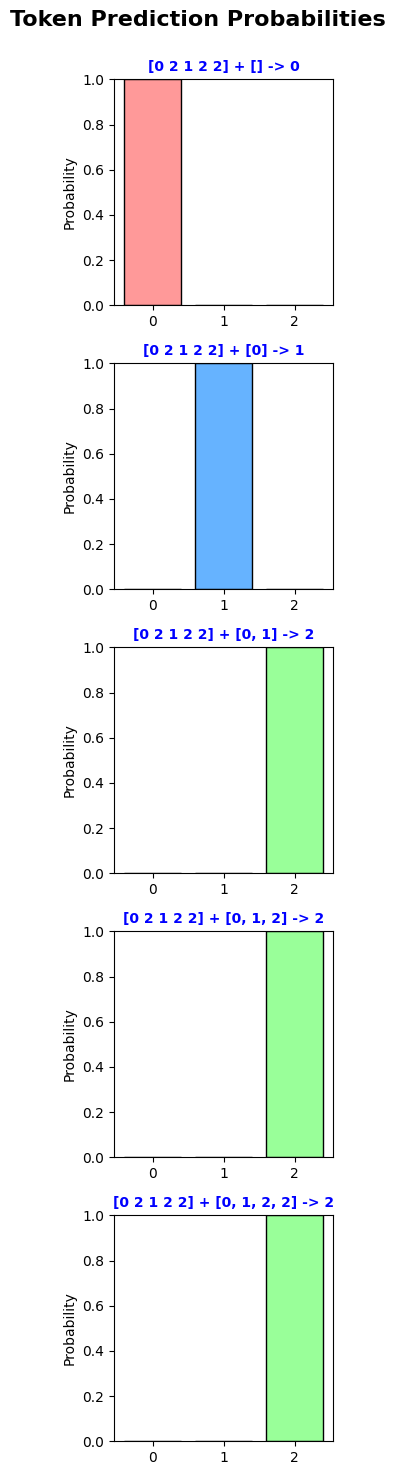

In [21]:
# draw probability distribution
import matplotlib.pyplot as plt

figure, axis = plt.subplots(5, 1, figsize=(3, 15))
prev_token = []

# Iterate and plot probabilities
for i, prob in enumerate(y['probs']):
    labels = [0, 1, 2]
    prob_i = prob[0]
    
    # Create a bar plot for each probability distribution
    axis[i].bar(labels, prob_i, color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')
    
    # Adding title and formatting it
    cur_token = y['input_ids'][0][i]
    axis[i].set_title(f"{x} + {prev_token} -> {cur_token}", fontsize=10, color='blue', fontweight='bold')
    
    # Adding y-axis label
    axis[i].set_ylabel('Probability', fontsize=10)
    
    # Adding some more styling
    axis[i].set_xticks(labels)
    axis[i].set_ylim(0, 1)
    
    prev_token.append(cur_token)

# Overall plot title and layout adjustments
figure.suptitle('Token Prediction Probabilities', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [22]:
_, attns = sort_model.forward_w_att(x_.unsqueeze(0))

torch.Size([1, 3, 9, 9])
torch.Size([1, 3, 9, 9])
torch.Size([1, 3, 9, 9])


In [23]:
tokens = x_.detach().numpy().tolist()
tokens = [str(t) for t in tokens]

In [24]:

from bertviz import head_view
head_view(attns,tokens)

<IPython.core.display.Javascript object>